<a href="https://colab.research.google.com/github/Anuj-1996/Maritime_Ship_CO2_Emission_Analysis/blob/main/EU_CO2_emissions_from_maritime_transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA of CO2 emissions from maritime transport (Europe)**

For this EDA, the dataset has downloaded from the EU MRV website : https://mrv.emsa.europa.eu/#public/emission-report.

The EU MRV (Monitoring, Reporting, Verification) Regulation entered into force on 1 July 2015, and requires ship owners and operators to annually monitor, report and verify CO2 emissions for vessels larger than 5000 gross tonnage (GT) calling at any EU and EFTA (Norway and Iceland) port.

## Preliminary Dataset

Year wise dataset available on the EU MRV website from 2018 to 2021 in the Excel format. The year-wise dataset downloaded on local drive and merge on the Excel. Also, deleted unnecessory/empty column from the dataset.

In [ ]:
#Mounting Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#importing libraries
import pandas as pd
import numpy as np

#Chi-Suquare test
import scipy.stats as stats

#visualization Libraries: Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn
import seaborn as sns
sns.set()

#plotly go and px
import plotly
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# import plotly.offline as pyo
# # Set notebook mode to work in offline
# pyo.init_notebook_mode()

#uncomment this only exporting to github. Uncomment this, then run and save to github.
# import plotly.io as pio

# pio.renderers

# pio.renderers.default = "svg"

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import klib
import movecolumn as mc

In [ ]:
# Importing Excel from the drive and converting excel to pandas df
dataset = pd.read_excel('/content/drive/MyDrive/EU_CO2_Emission_Data/2018_2021_EU_ship_emission_dataset.xlsx', parse_dates=['Reporting Period'])

In [ ]:
#creating copy of the main dataset
df = dataset.copy()

In [ ]:
# remove spaces in columns name
df.columns = df.columns.str.replace(' ','_')


# 1. EDA

## Dataset Overview

In [ ]:
# Displaying 1st five rows 
df.head()

,IMO_Number,Name,Ship_type,Reporting_Period,Technical_efficiency_Type,Technical_efficiency_[gCO2/t·nm],A,B,C,D,...,CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes],Total_CO2_emissions_[m_tonnes],CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes],Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile],Annual_Total_time_spent_at_sea_[hours],Total_time_spent_at_sea_[hours],Total_time_spent_at_sea_through_ice_[hours]
0,6703343,EQUALITY,Other ship types,2021-01-01,EIV,57.84,Yes,NaN,NaN,NaN,...,NaN,1184.62,0.00,889.0,247.0,48.00,222.80,594.00,594.00,NaN
1,7037806,IONIAN STAR,Ro-pax ship,2021-01-01,EIV,19.40,Yes,NaN,NaN,NaN,...,3264.35,6097.81,5440.71,0.0,0.0,657.23,263.01,1771.00,1771.00,NaN
2,7043843,TALOS,Ro-ro ship,2021-01-01,EIV,48.71,Yes,NaN,Yes,NaN,...,NaN,6674.22,6431.85,0.0,0.0,242.37,185.05,2992.36,2992.36,NaN
3,7128332,SEA WIND,Ro-pax ship,2021-01-01,EIV,9.29,Yes,NaN,NaN,NaN,...,2082.82,10454.38,8265.50,0.0,0.0,2001.71,296.12,2737.00,2737.00,NaN
4,7226952,FJARDVAGEN,Ro-ro ship,2021-01-01,EIV,43.00,Yes,NaN,NaN,NaN,...,NaN,5355.81,4596.60,0.0,0.0,759.20,157.51,2494.00,2494.00,NaN


In [ ]:
#shape of the Dataset
print('\n Shape:',df.shape)


 Shape: (48848, 28)


In [ ]:
#Column or Feature in the dataset
print("\nNumber of features:", df.shape[1])
print("\nFeatures:")
print(df.columns.tolist())


Number of features: 28

Features:
['IMO_Number', 'Name', 'Ship_type', 'Reporting_Period', 'Technical_efficiency_Type', 'Technical_efficiency_[gCO2/t·nm]', 'A', 'B', 'C', 'D', 'Ice_Class', 'Port_of_Registry', 'Home_Port', 'Verifier_Country', 'Total_fuel_consumption_[m_tonnes]', 'Fuel_consumptions_assigned_to_On_laden_[m_tonnes]', 'Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]', 'CO₂_emissions_assigned_to_Freight_transport_[m_tonnes]', 'CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes]', 'Total_CO2_emissions_[m_tonnes]', 'CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes]', 'CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes]', 'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes]', 'CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes]', 'Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile]', 'Annual_Total_time_spent_at_sea_[hours]', 'Tot

In [ ]:
#unique value

print("\n Unique values:")
print(df.nunique())



 Unique values:
IMO_Number                                                                                     18265
Name                                                                                           19451
Ship_type                                                                                         15
Reporting_Period                                                                                   4
Technical_efficiency_Type                                                                          2
Technical_efficiency_[gCO2/t·nm]                                                                3061
A                                                                                                  1
B                                                                                                  1
C                                                                                                  1
D                                                                         

In [ ]:
#Data Type
print("\n Datatype:")
df.dtypes


 Datatype:


IMO_Number                                                                                              int64
Name                                                                                                   object
Ship_type                                                                                              object
Reporting_Period                                                                               datetime64[ns]
Technical_efficiency_Type                                                                              object
Technical_efficiency_[gCO2/t·nm]                                                                      float64
A                                                                                                      object
B                                                                                                      object
C                                                                                                      object
D         

In [ ]:
#missing value
missing_value = df.isnull().sum().values.sum()

if missing_value == 0:
  print('\n Missing Values: No Missing Values')
else:
  print('\n Missing Values:', missing_value)


 Missing Values: 418658


In [ ]:
#Describe
print("\n Statistics:")
df.describe().T


 Statistics:


,count,mean,std,min,25%,50%,75%,max
IMO_Number,48848.0,9.452908e+06,2.872266e+05,5383304.00,9.307798e+06,9451575.000,9.662370e+06,9.924912e+06
Technical_efficiency_[gCO2/t·nm],44898.0,1.331610e+01,2.406462e+02,0.00,4.500000e+00,7.090,1.448000e+01,4.622200e+04
Total_fuel_consumption_[m_tonnes],48848.0,3.580911e+03,4.535996e+03,0.00,1.046290e+03,2060.890,4.083733e+03,9.846520e+04
Fuel_consumptions_assigned_to_On_laden_[m_tonnes],5835.0,3.074454e+03,4.383853e+03,0.00,7.528650e+02,1452.300,2.990055e+03,4.471546e+04
Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile],47172.0,1.474532e+02,3.409518e+03,2.79,7.749000e+01,99.630,1.425425e+02,7.192070e+05
CO₂_emissions_assigned_to_Freight_transport_[m_tonnes],1507.0,2.060970e+04,1.964669e+04,0.00,5.827705e+03,15474.850,2.969251e+04,1.270266e+05
CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes],1527.0,1.726337e+04,1.880642e+04,0.00,3.652950e+03,10300.620,2.430511e+04,1.054151e+05
Total_CO2_emissions_[m_tonnes],48848.0,1.117477e+04,1.404531e+04,0.00,3.283740e+03,6472.610,1.282207e+04,3.154785e+05
CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],48848.0,3.406427e+03,1.166661e+04,0.00,0.000000e+00,562.905,2.477742e+03,1.672576e+06
CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],48848.0,3.402532e+03,5.086573e+03,0.00,6.963575e+02,1844.540,3.830892e+03,1.706430e+05


From the above statistics, the column 'Annual_Total_time_spent_at_sea_[hours]' and 'Total_time_spent_at_sea_through_ice_[hours]' have same statistics. Thus dropping 'Total_time_spent_at_sea_[hours]' column as it lowers the adjusted R-square.

In [ ]:
df.drop('Total_time_spent_at_sea_[hours]', axis= 1, inplace =True)
df.head()

,IMO_Number,Name,Ship_type,Reporting_Period,Technical_efficiency_Type,Technical_efficiency_[gCO2/t·nm],A,B,C,D,...,CO₂_emissions_assigned_to_Freight_transport_[m_tonnes],CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes],Total_CO2_emissions_[m_tonnes],CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes],Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile],Annual_Total_time_spent_at_sea_[hours],Total_time_spent_at_sea_through_ice_[hours]
0,6703343,EQUALITY,Other ship types,2021-01-01,EIV,57.84,Yes,NaN,NaN,NaN,...,NaN,NaN,1184.62,0.00,889.0,247.0,48.00,222.80,594.00,NaN
1,7037806,IONIAN STAR,Ro-pax ship,2021-01-01,EIV,19.40,Yes,NaN,NaN,NaN,...,2176.23,3264.35,6097.81,5440.71,0.0,0.0,657.23,263.01,1771.00,NaN
2,7043843,TALOS,Ro-ro ship,2021-01-01,EIV,48.71,Yes,NaN,Yes,NaN,...,NaN,NaN,6674.22,6431.85,0.0,0.0,242.37,185.05,2992.36,NaN
3,7128332,SEA WIND,Ro-pax ship,2021-01-01,EIV,9.29,Yes,NaN,NaN,NaN,...,6182.66,2082.82,10454.38,8265.50,0.0,0.0,2001.71,296.12,2737.00,NaN
4,7226952,FJARDVAGEN,Ro-ro ship,2021-01-01,EIV,43.00,Yes,NaN,NaN,NaN,...,NaN,NaN,5355.81,4596.60,0.0,0.0,759.20,157.51,2494.00,NaN


## Handling Missing Values

<AxesSubplot:>

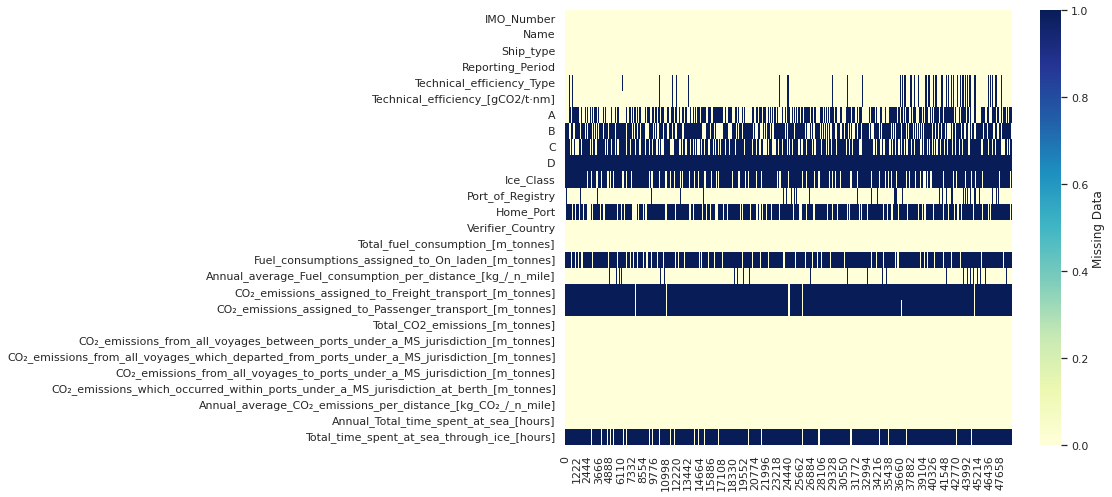

In [ ]:
#Plotting Missing Values
plt.figure(figsize=(10,8))
sns.heatmap(df.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

A,B,C,D are the methods of Monitoring of fuel consumption.

* Method A: BDN and periodic stocktakes of fuel tanks, 
* Method B: Bunker fuel tank
monitoring
* Method C: Flow meters for applicable combustion processes 
* Method D: Direct CO2 emissions measurement

Reference :  Annex I of EU Regulation 2016/1927  https://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R1927&from=EN

Not all the Ships are Ice class. Instead of Dropping the Ice Class and Total time spent at sea through ice (hours) columns, filled with 0. 
Replacing 'Yes' with 1 and blanks in the A,B,C,D with 0 (Binary encoding)




<AxesSubplot:>

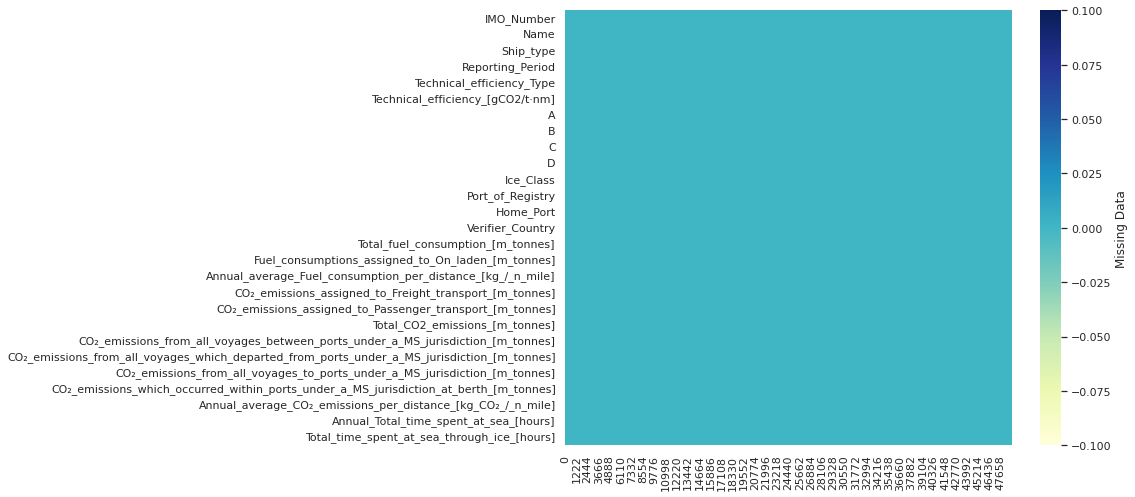

In [ ]:
##Replacing Nan with 0

#Note: Replacing the 'Ice Class' nan valus with 'No'. Later, Sklearn's label encoder converting it to integer 0 value along with other categorical/object values (IA,IB,PC1,..etc)

df['Port_of_Registry'] = df['Port_of_Registry'].fillna('No')
df['Home_Port'] = df['Home_Port'].fillna('No')

df['Technical_efficiency_[gCO2/t·nm]'] = df['Technical_efficiency_[gCO2/t·nm]'].fillna(0)

df['Ice_Class'] = df['Ice_Class'].fillna('No')
df['Fuel_consumptions_assigned_to_On_laden_[m_tonnes]'] = df['Fuel_consumptions_assigned_to_On_laden_[m_tonnes]'].fillna(0)
df['Total_time_spent_at_sea_through_ice_[hours]'] = df['Total_time_spent_at_sea_through_ice_[hours]'].fillna(0)
df['Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]'] = df['Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]'].fillna(0)

df['CO₂_emissions_assigned_to_Freight_transport_[m_tonnes]'] = df['CO₂_emissions_assigned_to_Freight_transport_[m_tonnes]'].fillna(0)
df['CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes]'] = df['CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes]'].fillna(0)



df['Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile]'] = df['Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile]'].fillna(0)

#replacing/mapping yes with 1
df['Technical_efficiency_Type'] = df['Technical_efficiency_Type'].map({'EIV': 1, 'EEDI': 2})
df['A'] = df['A'].map({'Yes': 1})
df['B'] = df['B'].map({'Yes': 1})
df['C'] = df['C'].map({'Yes': 1})
df['D'] = df['D'].map({'Yes': 1})

#Replacing Nan with 0
df['Technical_efficiency_Type'] = df['Technical_efficiency_Type'].fillna(0)
df['A'] = df['A'].fillna(0)
df['B'] = df['B'].fillna(0)
df['C'] = df['C'].fillna(0)
df['D'] = df['D'].fillna(0)


                      
#Re-Plotting Missing Values
plt.figure(figsize=(10,8))
sns.heatmap(df.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

In [ ]:
df.head()

,IMO_Number,Name,Ship_type,Reporting_Period,Technical_efficiency_Type,Technical_efficiency_[gCO2/t·nm],A,B,C,D,...,CO₂_emissions_assigned_to_Freight_transport_[m_tonnes],CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes],Total_CO2_emissions_[m_tonnes],CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes],Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile],Annual_Total_time_spent_at_sea_[hours],Total_time_spent_at_sea_through_ice_[hours]
0,6703343,EQUALITY,Other ship types,2021-01-01,1.0,57.84,1.0,0.0,0.0,0.0,...,0.00,0.00,1184.62,0.00,889.0,247.0,48.00,222.80,594.00,0.0
1,7037806,IONIAN STAR,Ro-pax ship,2021-01-01,1.0,19.40,1.0,0.0,0.0,0.0,...,2176.23,3264.35,6097.81,5440.71,0.0,0.0,657.23,263.01,1771.00,0.0
2,7043843,TALOS,Ro-ro ship,2021-01-01,1.0,48.71,1.0,0.0,1.0,0.0,...,0.00,0.00,6674.22,6431.85,0.0,0.0,242.37,185.05,2992.36,0.0
3,7128332,SEA WIND,Ro-pax ship,2021-01-01,1.0,9.29,1.0,0.0,0.0,0.0,...,6182.66,2082.82,10454.38,8265.50,0.0,0.0,2001.71,296.12,2737.00,0.0
4,7226952,FJARDVAGEN,Ro-ro ship,2021-01-01,1.0,43.00,1.0,0.0,0.0,0.0,...,0.00,0.00,5355.81,4596.60,0.0,0.0,759.20,157.51,2494.00,0.0


Skewness: 171.988744
Kurtosis: 33300.341039


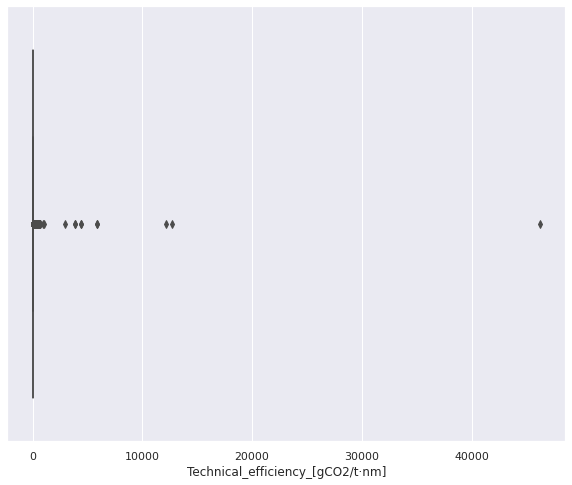

In [ ]:
#Plotting box plot for Technical Effieiecny to visualize Quantiles and Median
sns.set_style("darkgrid")
plt.figure( figsize=(10,8))

sns.boxplot( df['Technical_efficiency_[gCO2/t·nm]'], data = df)

print("Skewness: %f" % df['Technical_efficiency_[gCO2/t·nm]'].skew())
print("Kurtosis: %f" % df['Technical_efficiency_[gCO2/t·nm]'].kurt())


The above box plot is not giving significant value of the median as the data is highly skewed and has leptokurtic distribution (Kurtosis > 3)

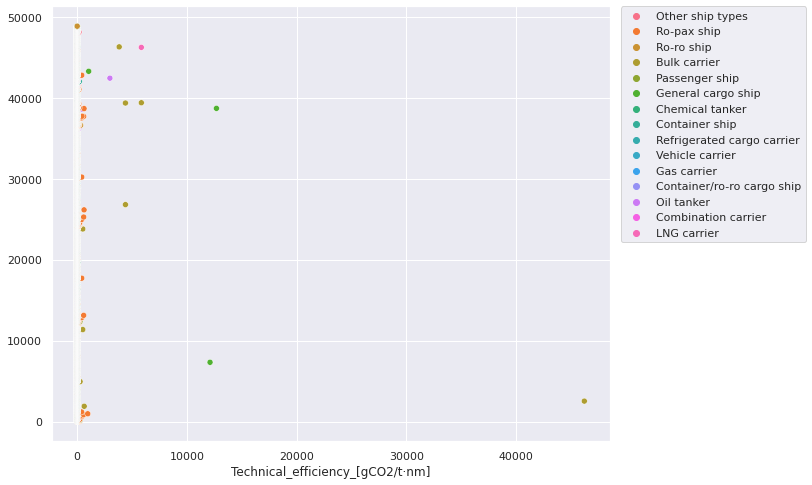

In [ ]:
#Scatterplot
plt.figure(figsize = (10,8))
sns.set_style('darkgrid')
sns.scatterplot(x = df['Technical_efficiency_[gCO2/t·nm]'], y = df.index, data = df, hue = 'Ship_type')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

The 'Ro-Ro Pax', 'Ro-Ro', 'General Cargo' , 'LNG carrier', 'Oil Tanker' having outliers in the dataset, resulting Kurtosis > 3.

In [ ]:
df['Technical_efficiency_[gCO2/t·nm]'].describe()

count    48848.000000
mean        12.239321
std        230.739810
min          0.000000
25%          4.040000
50%          6.540000
75%         13.680000
max      46222.000000
Name: Technical_efficiency_[gCO2/t·nm], dtype: float64

In [ ]:
from scipy import stats
#Removing Outliers from the Technical_efficiency using Quantile filteration method

# 1st percentile
q_low = df['Technical_efficiency_[gCO2/t·nm]'].quantile(0.01)

#99th percentile
q_hi  = df['Technical_efficiency_[gCO2/t·nm]'].quantile(0.99)

#filteration
df_filtered = df[(df['Technical_efficiency_[gCO2/t·nm]'] < q_hi)]
df_filtered.head()

,IMO_Number,Name,Ship_type,Reporting_Period,Technical_efficiency_Type,Technical_efficiency_[gCO2/t·nm],A,B,C,D,...,CO₂_emissions_assigned_to_Freight_transport_[m_tonnes],CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes],Total_CO2_emissions_[m_tonnes],CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes],Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile],Annual_Total_time_spent_at_sea_[hours],Total_time_spent_at_sea_through_ice_[hours]
1,7037806,IONIAN STAR,Ro-pax ship,2021-01-01,1.0,19.40,1.0,0.0,0.0,0.0,...,2176.23,3264.35,6097.81,5440.71,0.0,0.0,657.23,263.01,1771.00,0.0
3,7128332,SEA WIND,Ro-pax ship,2021-01-01,1.0,9.29,1.0,0.0,0.0,0.0,...,6182.66,2082.82,10454.38,8265.50,0.0,0.0,2001.71,296.12,2737.00,0.0
6,7310507,FIDELITY,Other ship types,2021-01-01,1.0,31.13,1.0,0.0,0.0,0.0,...,0.00,0.00,2720.30,0.00,1585.0,1094.0,41.00,166.32,1431.00,0.0
7,7325095,LAMPEDUSA,Ro-pax ship,2021-01-01,1.0,35.34,0.0,1.0,0.0,0.0,...,5825.43,41.52,5866.95,2746.19,0.0,0.0,3120.74,358.58,1272.25,0.0
9,7350090,MOBY NIKI,Ro-pax ship,2021-01-01,1.0,7.61,1.0,0.0,0.0,0.0,...,1235.02,6784.51,8019.53,5630.94,0.0,0.0,2388.59,374.10,1582.27,0.0


In [ ]:
#Lets compare the results of original technical eff with filtered technical efficiency after filtering the outliers
df_compare = pd.DataFrame()
df_compare['Original_Technical_efficiency'] = df['Technical_efficiency_[gCO2/t·nm]']
df_compare['Filtered_Technical_efficiency'] = df_filtered['Technical_efficiency_[gCO2/t·nm]']
df_compare.head()

,Original_Technical_efficiency,Filtered_Technical_efficiency
0,57.84,NaN
1,19.40,19.40
2,48.71,NaN
3,9.29,9.29
4,43.00,NaN


In [ ]:
#Keeping the NaN values in the df_compare dataframe
df_compare.describe()

,Original_Technical_efficiency,Filtered_Technical_efficiency
count,48848.000000,48359.000000
mean,12.239321,9.322444
std,230.739810,7.811636
min,0.000000,0.000000
25%,4.040000,4.020000
50%,6.540000,6.460000
75%,13.680000,13.430000
max,46222.000000,42.730000


The STD of the quantile filtered technical eff < STD of original technical eff 

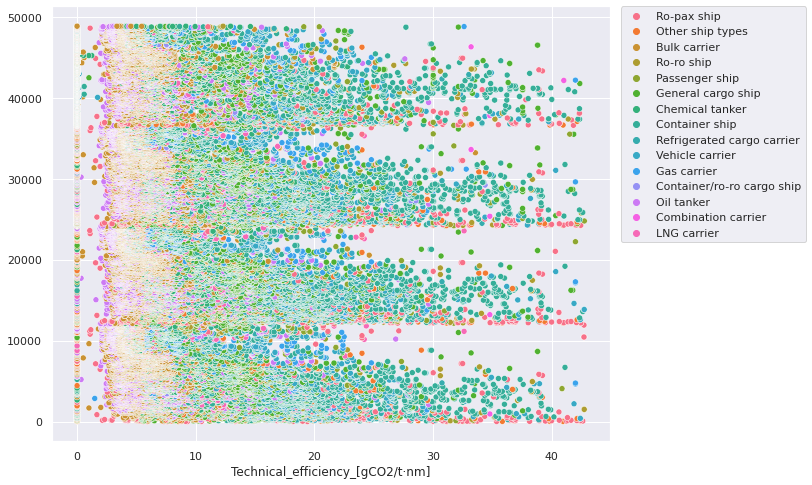

In [ ]:
#Scatterplot
plt.figure(figsize = (10,8))
sns.scatterplot(x = df_filtered['Technical_efficiency_[gCO2/t·nm]'], y = df_filtered.index , data = df_filtered, hue = 'Ship_type')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Skewness: 1.376622
Kurtosis: 1.800682


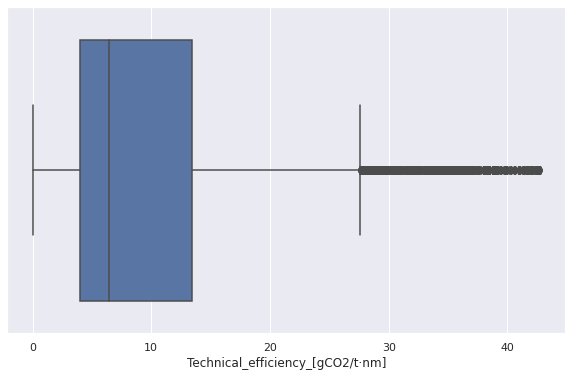

In [ ]:
plt.figure( figsize=(10,6))

sns.boxplot( df_filtered['Technical_efficiency_[gCO2/t·nm]'], data = df_filtered)

print("Skewness: %f" % df_filtered['Technical_efficiency_[gCO2/t·nm]'].skew())
print("Kurtosis: %f" % df_filtered['Technical_efficiency_[gCO2/t·nm]'].kurt())

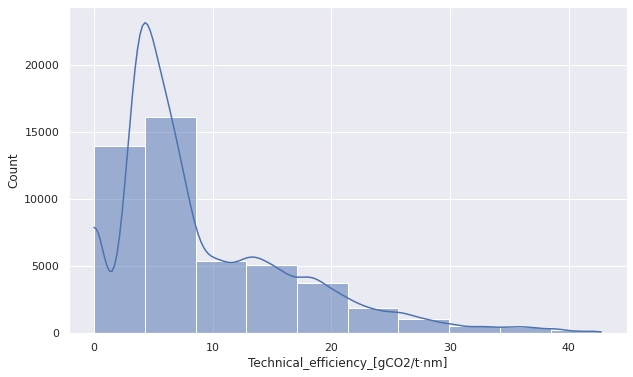

In [ ]:
plt.figure( figsize=(10,6))
sns.histplot( df_filtered['Technical_efficiency_[gCO2/t·nm]'], kde = True, bins = 10 )
plt.show()

## Comparative analysis and feature selection





In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48359 entries, 1 to 48847
Data columns (total 27 columns):
 #   Column                                                                                       Non-Null Count  Dtype         
---  ------                                                                                       --------------  -----         
 0   IMO_Number                                                                                   48359 non-null  int64         
 1   Name                                                                                         48359 non-null  object        
 2   Ship_type                                                                                    48359 non-null  object        
 3   Reporting_Period                                                                             48359 non-null  datetime64[ns]
 4   Technical_efficiency_Type                                                                    48359 non-null  flo

### Hadnling Categorical Features

Categorical Features : Name, Ship_type, Verifier Country, Ice Class

In [ ]:
#Unique Name values
print('Unique Name values:' , df_filtered.Name.unique())
print('Length of Unique Name values :' , len(df_filtered.Name.unique()))

Unique Name values: ['IONIAN STAR' 'SEA WIND' 'FIDELITY' ... 'BW RADON' 'SOUTHGATE'
 'MSXT ATHENA']
Length of Unique Name values : 19352


In [ ]:
#Unique Ship_type values
print('Unique Ship_type values:' , df_filtered.Ship_type.unique())
print('Length of Unique Ship_type values :' , len(df_filtered.Ship_type.unique()))

Unique Ship_type values: ['Ro-pax ship' 'Other ship types' 'Bulk carrier' 'Ro-ro ship'
 'Passenger ship' 'General cargo ship' 'Chemical tanker' 'Container ship'
 'Refrigerated cargo carrier' 'Vehicle carrier' 'Gas carrier'
 'Container/ro-ro cargo ship' 'Oil tanker' 'Combination carrier'
 'LNG carrier']
Length of Unique Ship_type values : 15


In [ ]:
#Unique Ice_Class values
print('Unique Ice_Class values:' , df_filtered.Ice_Class.unique())
print('Length of Unique Ice_Class values :' , len(df_filtered.Ice_Class.unique()))

Unique Ice_Class values: ['No' 'IB' 'IC' 'IA' 'IA Supper' 'PC4' 'PC1' 'PC7' 'PC3' 'PC5' 'PC2' 'PC6']
Length of Unique Ice_Class values : 12


In [ ]:
#Unique Verifier_Country values
print('Unique Verifier_Country values:' , df_filtered.Verifier_Country.unique())
print('Length of Unique Verifier_Country values :' , len(df_filtered.Verifier_Country.unique()))

Unique Verifier_Country values: ['France' 'Greece' 'Italy' 'Germany' 'Croatia' 'China' 'Japan'
 'Korea, Republic of' 'Russian Federation' 'India' 'Portugal' 'Poland'
 'Sweden' 'United Kingdom']
Length of Unique Verifier_Country values : 14


In [ ]:
#Unique Port_of_Registry values
print('Length of Unique Port_of_Registry values :' , len(df_filtered.Port_of_Registry.unique()))

Length of Unique Port_of_Registry values : 716


In [ ]:
#Unique Home_Port values
print('Length of Unique Home_Port values :' , len(df_filtered.Home_Port.unique()))

Length of Unique Home_Port values : 394


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Name'.
df_filtered['Name']= label_encoder.fit_transform(df_filtered['Name'])
  
df_filtered['Name'].unique()

array([ 8425, 15443,  6156, ...,  2990, 16320, 11934])

In [ ]:
# Encode labels in column 'Name'.
df_filtered['Ship_type']= label_encoder.fit_transform(df_filtered['Ship_type'])
  
df_filtered['Ship_type'].unique()

array([12,  9,  0, 13, 10,  6,  1,  3, 11, 14,  5,  4,  8,  2,  7])

In [ ]:
# Encode labels in column 'Ice_Class'.
df_filtered['Ice_Class']= label_encoder.fit_transform(df_filtered['Ice_Class'])
  
df_filtered['Ice_Class'].unique()

array([ 4,  2,  3,  0,  1,  8,  5, 11,  7,  9,  6, 10])

In [ ]:
# Encode labels in column 'Verifier_Country'.
df_filtered['Verifier_Country']= label_encoder.fit_transform(df_filtered['Verifier_Country'])
  
df_filtered['Verifier_Country'].unique()

array([ 2,  4,  6,  3,  1,  0,  7,  8, 11,  5, 10,  9, 12, 13])

In [ ]:
# Encode labels in column 'Reporting_Period'.
df_filtered['Port_of_Registry']= label_encoder.fit_transform(df_filtered['Port_of_Registry'])
  
df_filtered['Port_of_Registry'].unique()

array([435, 604,  61, 108, 409, 104, 380, 411, 292, 641, 289, 486, 316,
       445, 493, 189, 558, 301, 497,  94, 267, 121, 637, 313, 365, 160,
       187, 434, 656, 673, 317, 534, 694, 628, 164, 419, 327, 358, 425,
       155, 350, 394, 455, 446, 224,  67, 439,  74, 250, 408, 286,  80,
       605,  15, 635, 618, 235, 485,  20, 392, 623, 584, 338, 616,  35,
        69,  78, 463, 125, 124, 457, 530,  38, 464,  60, 321, 276, 602,
        63, 344,  82, 103, 223, 221, 118, 369, 444, 359, 251,  88, 538,
       681, 713, 193, 101, 300, 698, 403, 366,  59, 498, 212, 229,  21,
        28, 198, 587, 153, 550, 525, 178, 677, 606,  24,   9, 274, 686,
        47, 141, 658, 222, 255, 257, 481,  32, 454, 252, 154, 510, 331,
       570, 205, 591, 295, 133, 106, 491, 173, 183, 595, 706, 470, 442,
       624, 278, 176, 472, 191, 259, 648, 218, 583,  43, 714,  19, 511,
       373,  98, 151, 526,  45, 219, 374,  44, 322, 232,  46,  79, 543,
       613,  86, 211, 619, 504, 566,  37, 599,  96,  97, 320, 29

In [ ]:
# Encode labels in column 'Home_Port'.
df_filtered['Home_Port']= label_encoder.fit_transform(df_filtered['Home_Port'])
  
df_filtered['Home_Port'].unique()

array([254, 327, 244,  72, 242,  31, 259, 279, 118, 213, 218,  17, 359,
       185,  46, 340, 227, 214, 207, 372, 240, 150,  77, 257,  56, 110,
        61, 167, 345, 328,   6, 333, 278, 219, 292, 321, 192, 171,  52,
       343,  59, 271,  27, 325,  48, 221, 215, 151, 258,  66,  14, 375,
        69,  39,  47,  45, 197, 136,  12,  18,  23, 231, 183, 323, 289,
        16, 274, 383, 275,  32,  82, 203, 133, 230, 281, 174,  87, 109,
       386, 140, 111,  37, 351, 100, 123, 131, 265,   9, 378,  95, 223,
        92,  60, 300, 342, 270,  26, 191, 235,  35, 170, 122, 134,   0,
       382, 313, 152, 168, 193, 305, 186, 190,  65,   5,  29, 341, 142,
        63, 269, 112, 352, 245, 114,  90,  50, 211,  25, 182, 126, 177,
       316, 138, 346,  30, 154,  91, 317,  33, 273, 339, 246, 209, 163,
       392, 161, 125, 370, 311, 302, 226, 293, 376, 222, 369,   2, 208,
       248,  86, 159, 202, 363, 332, 115, 132, 146, 187, 249,  73, 294,
       233, 263, 308, 309, 318, 217, 358, 128, 166,  43, 326,  9

In [ ]:
df_filtered.dtypes

IMO_Number                                                                                       int64
Name                                                                                             int64
Ship_type                                                                                        int64
Reporting_Period                                                                                 int64
Technical_efficiency_Type                                                                      float64
Technical_efficiency_[gCO2/t·nm]                                                               float64
A                                                                                              float64
B                                                                                              float64
C                                                                                              float64
D                                                                        

## Correlation Matrix

<AxesSubplot:>

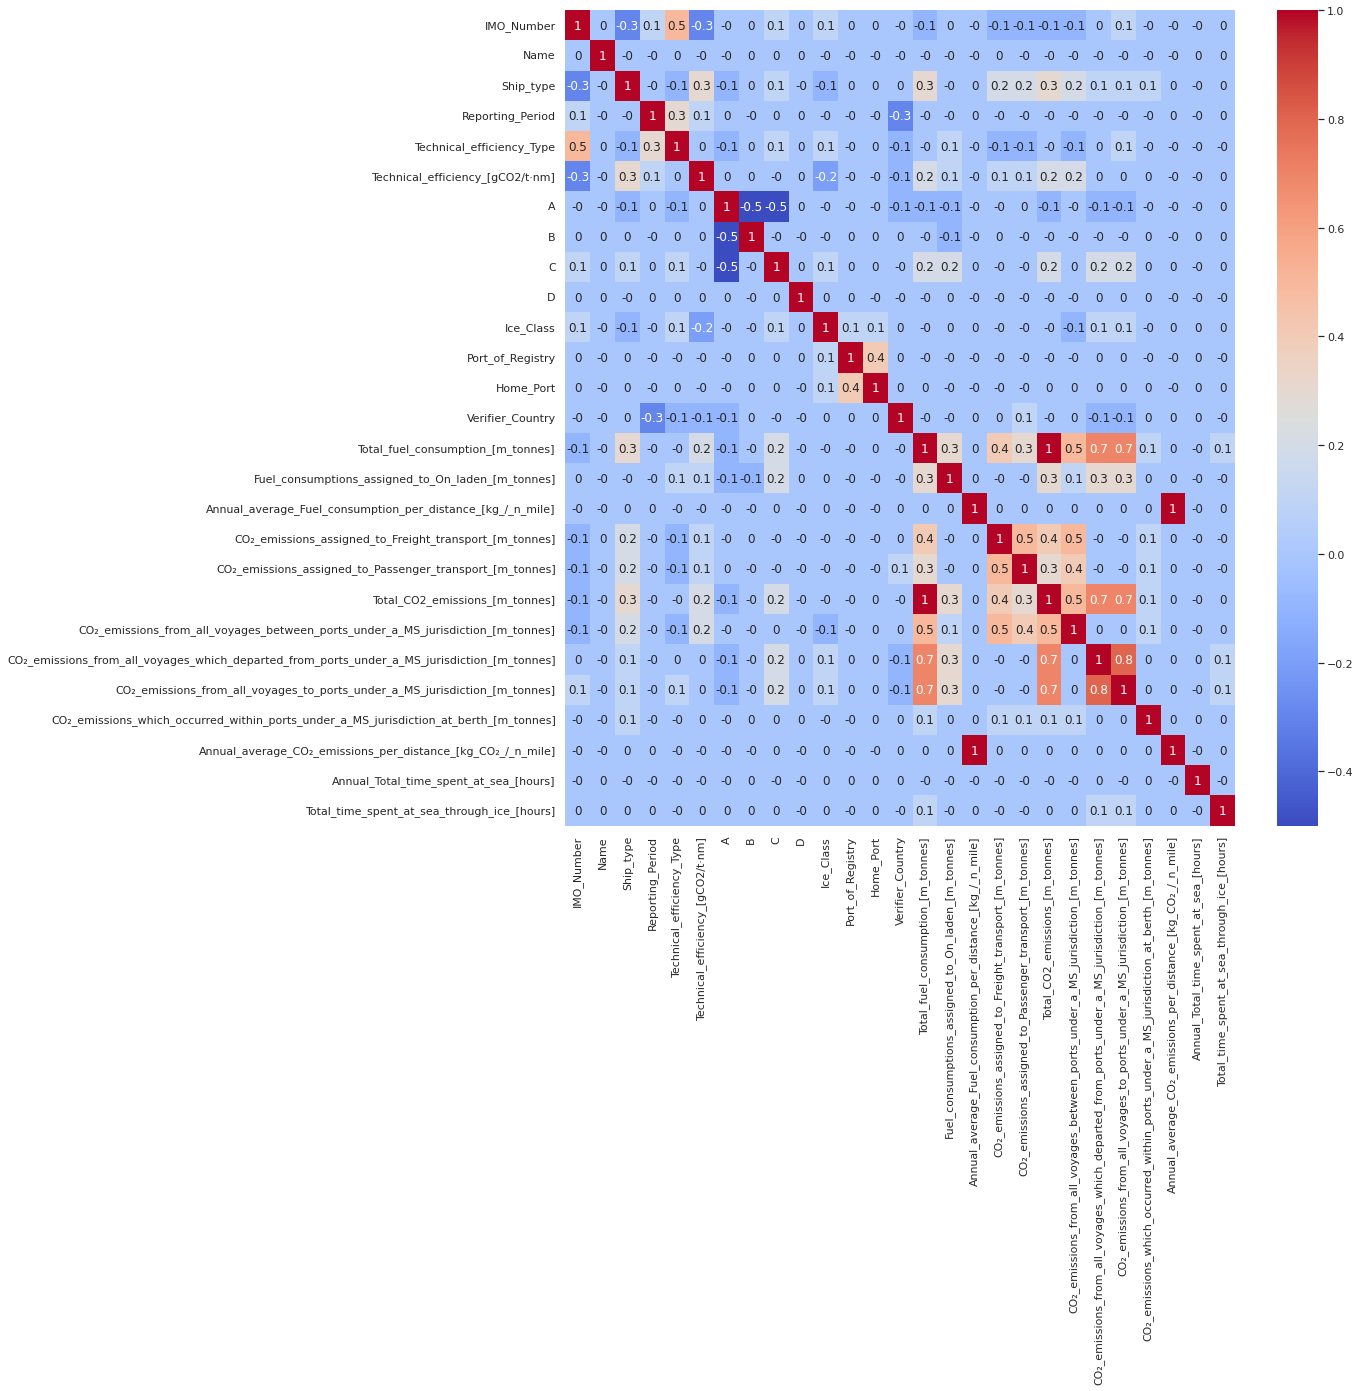

In [ ]:
plt.figure(figsize=(15, 15))
corr = round(df_filtered.corr(),1)
sns.heatmap(corr,cmap='coolwarm', annot=True)

# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

<AxesSubplot:>

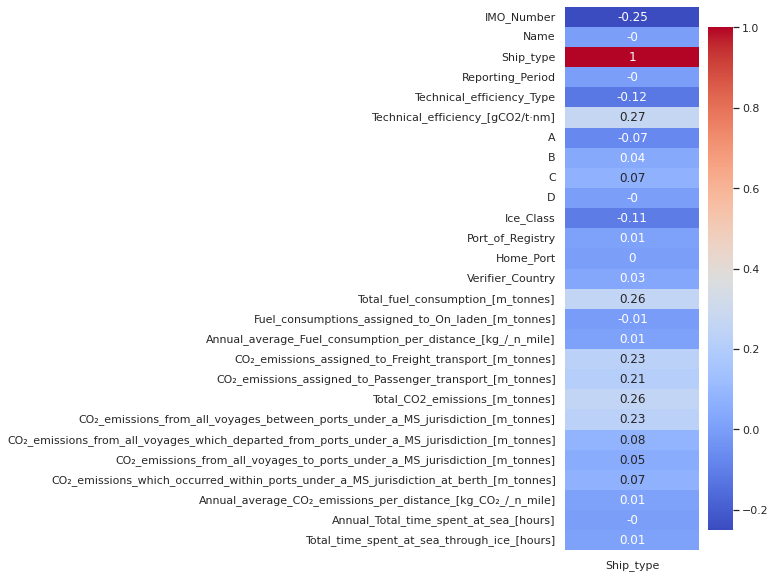

In [ ]:
plt.figure(figsize=(3, 10))
corr = round(df_filtered.corr()[['Ship_type']], 2)
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
df_filtered.columns

Index(['IMO_Number', 'Name', 'Ship_type', 'Reporting_Period',
       'Technical_efficiency_Type', 'Technical_efficiency_[gCO2/t·nm]', 'A',
       'B', 'C', 'D', 'Ice_Class', 'Port_of_Registry', 'Home_Port',
       'Verifier_Country', 'Total_fuel_consumption_[m_tonnes]',
       'Fuel_consumptions_assigned_to_On_laden_[m_tonnes]',
       'Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]',
       'CO₂_emissions_assigned_to_Freight_transport_[m_tonnes]',
       'CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes]',
       'Total_CO2_emissions_[m_tonnes]',
       'CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes]',
       'CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes]',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes]',
       'CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes]',
       'Annual_average_CO₂_emissions_per_distance_[kg_

In [ ]:
df_test = pd.DataFrame()
df_test['Ship_type'] = df_filtered['Ship_type']
df_test['Technical_efficiency'] = df_filtered['Technical_efficiency_[gCO2/t·nm]']
df_test['CO₂_emissions_assigned_to_Freight_transport'] = df_filtered['CO₂_emissions_assigned_to_Freight_transport_[m_tonnes]']
df_test['CO₂_emissions_assigned_to_Passenger_transport'] = df_filtered['CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes]']

df_test['Total_CO2_emissions'] = df_filtered['Total_CO2_emissions_[m_tonnes]']

df_test['CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction'] = df_filtered['CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes]']

df_test['Total_fuel_consumption'] = df_filtered['Total_fuel_consumption_[m_tonnes]']
df_test.head()

,Ship_type,Technical_efficiency,CO₂_emissions_assigned_to_Freight_transport,CO₂_emissions_assigned_to_Passenger_transport,Total_CO2_emissions,CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction,Total_fuel_consumption
1,12,19.40,2176.23,3264.35,6097.81,0.0,1902.00
3,12,9.29,6182.66,2082.82,10454.38,0.0,3299.89
6,9,31.13,0.00,0.00,2720.30,1094.0,860.30
7,12,35.34,5825.43,41.52,5866.95,0.0,1829.99
9,12,7.61,1235.02,6784.51,8019.53,0.0,2538.80


In [ ]:
df_test.columns

Index(['Ship_type', 'Technical_efficiency',
       'CO₂_emissions_assigned_to_Freight_transport',
       'CO₂_emissions_assigned_to_Passenger_transport', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction',
       'Total_fuel_consumption'],
      dtype='object')

# K means clustering

In [ ]:
#final Check of Missing Value
missing_value = df_test.isnull().sum().values.sum()

if missing_value == 0:
  print('\n Missing Values: No Missing Values')
else:
  print('\n Missing Values:', missing_value)


 Missing Values: No Missing Values


In [ ]:
#Sclaing
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler(feature_range=(0,1))
# fit scaler on data
scaler.fit(df_test[['Ship_type', 'Technical_efficiency',
       'CO₂_emissions_assigned_to_Freight_transport',
       'CO₂_emissions_assigned_to_Passenger_transport', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction',
       'Total_fuel_consumption']])
# apply transform
df_test[['Ship_type', 'Technical_efficiency',
       'CO₂_emissions_assigned_to_Freight_transport',
       'CO₂_emissions_assigned_to_Passenger_transport', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction',
       'Total_fuel_consumption']] = scaler.transform(df_test[['Ship_type', 'Technical_efficiency',
                                                            'CO₂_emissions_assigned_to_Freight_transport',
                                                            'CO₂_emissions_assigned_to_Passenger_transport', 'Total_CO2_emissions',
                                                            'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction',
                                                            'Total_fuel_consumption']])
df_test

,Ship_type,Technical_efficiency,CO₂_emissions_assigned_to_Freight_transport,CO₂_emissions_assigned_to_Passenger_transport,Total_CO2_emissions,CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction,Total_fuel_consumption
1,0.857143,0.454014,0.017132,0.030967,0.019329,0.000000,0.019316
3,0.857143,0.217412,0.048672,0.019758,0.033138,0.000000,0.033513
6,0.642857,0.728528,0.000000,0.000000,0.008623,0.003043,0.008737
7,0.857143,0.827054,0.045860,0.000394,0.018597,0.000000,0.018585
9,0.857143,0.178095,0.009723,0.064360,0.025420,0.000000,0.025784
...,...,...,...,...,...,...,...
48843,0.071429,0.302598,0.000000,0.000000,0.002462,0.000963,0.002521
48844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
48845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
48846,0.071429,0.214369,0.000000,0.000000,0.004919,0.003232,0.005043


Elbow Plot

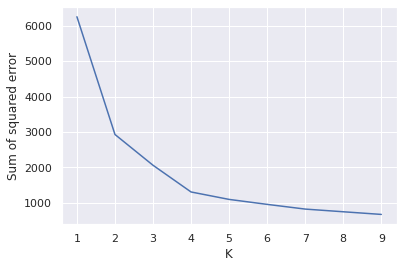

In [ ]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_test[['Ship_type', 'Technical_efficiency',
       'CO₂_emissions_assigned_to_Freight_transport',
       'CO₂_emissions_assigned_to_Passenger_transport', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction',
       'Total_fuel_consumption']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df_test[['Ship_type', 'Technical_efficiency',
       'CO₂_emissions_assigned_to_Freight_transport',
       'CO₂_emissions_assigned_to_Passenger_transport', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction',
       'Total_fuel_consumption']])
y_predicted

array([3, 3, 3, ..., 1, 1, 3], dtype=int32)

In [ ]:
df_test['cluster']=y_predicted
df_test.head()

,Ship_type,Technical_efficiency,CO₂_emissions_assigned_to_Freight_transport,CO₂_emissions_assigned_to_Passenger_transport,Total_CO2_emissions,CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction,Total_fuel_consumption,cluster
1,0.857143,0.454014,0.017132,0.030967,0.019329,0.000000,0.019316,3
3,0.857143,0.217412,0.048672,0.019758,0.033138,0.000000,0.033513,3
6,0.642857,0.728528,0.000000,0.000000,0.008623,0.003043,0.008737,3
7,0.857143,0.827054,0.045860,0.000394,0.018597,0.000000,0.018585,3
9,0.857143,0.178095,0.009723,0.064360,0.025420,0.000000,0.025784,3


In [ ]:
km.cluster_centers_

array([[ 5.57409880e-01,  1.18139072e-01,  4.01242056e-03,
         6.03563084e-03,  3.73906533e-02,  1.12977397e-02,
         3.88292810e-02],
       [ 3.42870513e-02,  1.25983559e-01, -1.04864034e-15,
         7.19910243e-16,  2.25675027e-02,  8.38618893e-03,
         2.30384963e-02],
       [ 2.81082935e-01,  4.37985609e-01, -3.92047506e-16,
         1.90819582e-16,  4.78945256e-02,  1.41044913e-02,
         4.90171680e-02],
       [ 9.00223483e-01,  4.72713704e-01,  4.05746720e-02,
         3.46196608e-02,  6.26493735e-02,  8.75770457e-03,
         6.40871470e-02]])

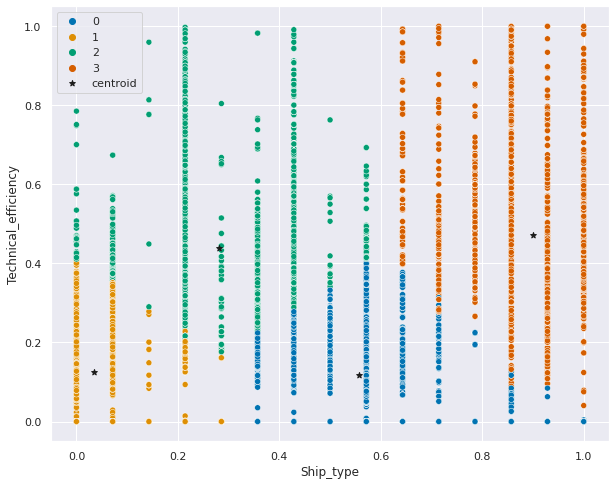

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df_test,x = df_test['Ship_type'], y = df_test['Technical_efficiency'], hue = 'cluster', palette='colorblind', legend='full' )

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='k',marker='*',label='centroid')
plt.legend()

In [ ]:
df_test[['Ship_type', 'Technical_efficiency',
       'CO₂_emissions_assigned_to_Freight_transport',
       'CO₂_emissions_assigned_to_Passenger_transport', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction',
       'Total_fuel_consumption']] = scaler.inverse_transform(df_test[['Ship_type', 'Technical_efficiency',
                                                                      'CO₂_emissions_assigned_to_Freight_transport',
                                                                      'CO₂_emissions_assigned_to_Passenger_transport', 'Total_CO2_emissions',
                                                                      'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction',
                                                                      'Total_fuel_consumption']])

In [ ]:
df_test

,Ship_type,Technical_efficiency,CO₂_emissions_assigned_to_Freight_transport,CO₂_emissions_assigned_to_Passenger_transport,Total_CO2_emissions,CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction,Total_fuel_consumption,cluster
1,12.0,19.40,2176.23,3264.35,6097.81,0.00,1902.00,3
3,12.0,9.29,6182.66,2082.82,10454.38,0.00,3299.89,3
6,9.0,31.13,0.00,0.00,2720.30,1094.00,860.30,3
7,12.0,35.34,5825.43,41.52,5866.95,0.00,1829.99,3
9,12.0,7.61,1235.02,6784.51,8019.53,0.00,2538.80,3
...,...,...,...,...,...,...,...,...
48843,1.0,12.93,0.00,0.00,776.86,346.15,248.28,1
48844,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1
48845,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1
48846,1.0,9.16,0.00,0.00,1551.75,1162.05,496.60,1


In [ ]:
df_test.columns

Index(['Ship_type', 'Technical_efficiency',
       'CO₂_emissions_assigned_to_Freight_transport',
       'CO₂_emissions_assigned_to_Passenger_transport', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction',
       'Total_fuel_consumption', 'cluster'],
      dtype='object')

<AxesSubplot:xlabel='cluster', ylabel='Ship_type'>

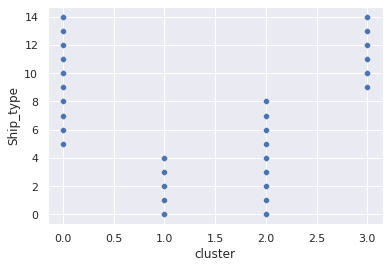

In [ ]:
sns.scatterplot(data = df_test,x = df_test['cluster'], y = df_test['Ship_type'] )

# RandomForest

In [ ]:
df_test.head()

,Ship_type,Technical_efficiency,CO₂_emissions_assigned_to_Freight_transport,CO₂_emissions_assigned_to_Passenger_transport,Total_CO2_emissions,CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction,Total_fuel_consumption,cluster
1,12.0,19.40,2176.23,3264.35,6097.81,0.0,1902.00,3
3,12.0,9.29,6182.66,2082.82,10454.38,0.0,3299.89,3
6,9.0,31.13,0.00,0.00,2720.30,1094.0,860.30,3
7,12.0,35.34,5825.43,41.52,5866.95,0.0,1829.99,3
9,12.0,7.61,1235.02,6784.51,8019.53,0.0,2538.80,3


In [ ]:
X = df_test.drop(['Ship_type', 'cluster'] ,axis='columns')
y = df_test.Ship_type
X.columns

Index(['Technical_efficiency', 'CO₂_emissions_assigned_to_Freight_transport',
       'CO₂_emissions_assigned_to_Passenger_transport', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction',
       'Total_fuel_consumption'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

rf  = RandomForestClassifier(n_estimators=80)
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.5847808105872622

In [ ]:
Cross_Val = cross_val_score(RandomForestClassifier(n_estimators=80),X,y,cv=5)
Cross_Val

array([0.58271299, 0.5789909 , 0.59822167, 0.58302316, 0.52062868])

In [ ]:
round(np.average(Cross_Val),2)

0.57

In [ ]:
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.64      0.80      0.71      2942
         1.0       0.38      0.31      0.34      1065
         2.0       0.00      0.00      0.00         8
         3.0       0.64      0.76      0.70      1436
         4.0       0.37      0.20      0.26        54
         5.0       0.21      0.07      0.11       265
         6.0       0.50      0.51      0.50      1022
         7.0       0.82      0.63      0.71       195
         8.0       0.56      0.44      0.49      1517
         9.0       0.17      0.07      0.10        97
        10.0       0.36      0.21      0.27       126
        11.0       0.56      0.35      0.43       127
        12.0       0.99      1.00      0.99       272
        13.0       0.58      0.37      0.45       189
        14.0       0.36      0.27      0.31       357

    accuracy                           0.58      9672
   macro avg       0.48      0.40      0.43      9672
weighted avg       0.56   

In [ ]:
X_KM = df_test.drop('Ship_type' ,axis='columns')
y_KM = df_test.Ship_type
X_KM.columns

Index(['Technical_efficiency', 'CO₂_emissions_assigned_to_Freight_transport',
       'CO₂_emissions_assigned_to_Passenger_transport', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction',
       'Total_fuel_consumption', 'cluster'],
      dtype='object')

In [ ]:
X_KM_train, X_KM_test, y_KM_train, y_KM_test = train_test_split(X_KM,y_KM,test_size=0.20)

rf_KM = RandomForestClassifier(n_estimators=80)
rf_KM.fit(X_KM_train, y_KM_train)

rf_KM.score(X_KM_test, y_KM_test)


0.7796732837055418

In [ ]:
Cross_Val_KM =cross_val_score(RandomForestClassifier(n_estimators=80),X_KM,y_KM,cv=5)
Cross_Val_KM

array([0.78546319, 0.78163772, 0.78918528, 0.77988007, 0.71822976])

In [ ]:
round(np.average(Cross_Val_KM),3)

0.771

In [ ]:
predictions_KM = rf_KM.predict(X_KM_test)
print(classification_report(y_KM_test, predictions_KM))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.88      2909
         1.0       0.64      0.47      0.54      1084
         2.0       0.00      0.00      0.00        13
         3.0       0.81      0.85      0.83      1477
         4.0       0.95      0.71      0.81        52
         5.0       0.41      0.18      0.25       250
         6.0       0.69      0.66      0.67      1041
         7.0       0.84      0.73      0.78       201
         8.0       0.81      0.91      0.86      1523
         9.0       0.37      0.18      0.24       106
        10.0       0.56      0.53      0.54        97
        11.0       0.61      0.57      0.59       102
        12.0       1.00      1.00      1.00       263
        13.0       0.76      0.54      0.63       199
        14.0       0.70      0.80      0.75       355

    accuracy                           0.78      9672
   macro avg       0.66      0.60      0.62      9672
weighted avg       0.76   

In [ ]:
#Analysis of EU Maritime CO2 Emission Data to Improve Ship Type Classification Combining KMeans Clustering and Random Forest

#Improvisation of Classification of ship types using KMeans Clustering and Random Forest by analysing EU Maritime CO2 emission data